In [1]:
from keras.datasets import mnist # mnist dataset
from keras import models
from keras import layers
from keras.utils import to_categorical

import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

Using TensorFlow backend.


Loading MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images.ndim

3

In [5]:
train_images.dtype

dtype('uint8')

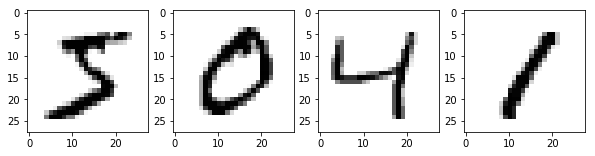

In [6]:
plt.figure(figsize=(10,10))
x, y = 4, 1
for i in range(4):  
    plt.subplot(y, x, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [7]:
train_labels[:4]

array([5, 0, 4, 1], dtype=uint8)

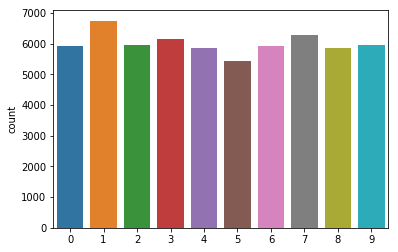

In [8]:
sns.countplot(train_labels)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_images.ndim

3

In [11]:
test_images.dtype

dtype('uint8')

Linear model definition

In [12]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Compiling the model

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Encoding the data

In [14]:
train_images_prepared = train_images.reshape((60000, 28 * 28))
train_images_prepared = train_images_prepared.astype('float32') / 255

test_images_prepared = test_images.reshape((10000, 28 * 28))
test_images_prepared = test_images_prepared.astype('float32') / 255

In [15]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

Setting a validation set

In [16]:
train_images_val = train_images_prepared[:6000]
train_images_partial = train_images_prepared[6000:]

train_labels_val = train_labels_one_hot[:6000]
train_labels_partial = train_labels_one_hot[6000:]

Training the model

In [17]:
history = model.fit(train_images_partial, train_labels_partial, epochs=10, batch_size=128, validation_data=(train_images_val, train_labels_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 88us/step - loss: 0.2708 - acc: 0.9211 - val_loss: 0.1430 - val_acc: 0.9573
Epoch 2/10
54000/54000 [==============================] - 5s 88us/step - loss: 0.1115 - acc: 0.9669 - val_loss: 0.0936 - val_acc: 0.9738
Epoch 3/10
54000/54000 [==============================] - 5s 88us/step - loss: 0.0731 - acc: 0.9780 - val_loss: 0.0808 - val_acc: 0.9747
Epoch 4/10
54000/54000 [==============================] - 5s 98us/step - loss: 0.0531 - acc: 0.9837 - val_loss: 0.0688 - val_acc: 0.9802
Epoch 5/10
54000/54000 [==============================] - 5s 89us/step - loss: 0.0400 - acc: 0.9880 - val_loss: 0.0679 - val_acc: 0.9815
Epoch 6/10
54000/54000 [==============================] - 5s 101us/step - loss: 0.0300 - acc: 0.9909 - val_loss: 0.0760 - val_acc: 0.9787
Epoch 7/10
54000/54000 [==============================] - 5s 97us/step - loss: 0.0231 - acc: 0.9931 - val_loss: 0.0668 - val_acc

Plotting training and validation loss

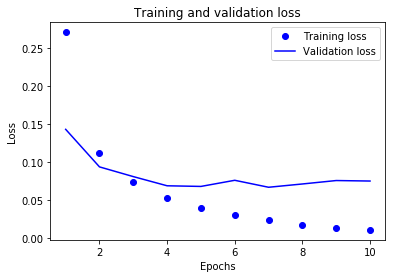

In [18]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting training and validation accuracy

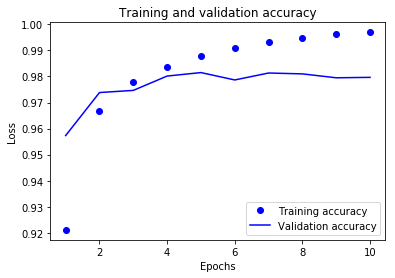

In [19]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Overfit begins after five epochs

In [20]:
final_loss, final_acc = model.evaluate(test_images_prepared, test_labels_one_hot)

10000/10000 [==============================] - 1s 56us/step


Final results

In [21]:
print('Final loss:', final_loss)
print('Final accuracy:', final_acc)

Final loss: 0.07060321021449927
Final accuracy: 0.9815


Generating predictions for two samples of numbers 4 and 9 from test images

First sample is a number 4 from test images

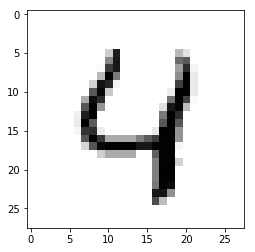

In [22]:
digit = test_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [23]:
test_labels[4]

4

In [24]:
prediction = model.predict(test_images_prepared[4:5], batch_size=784)
print(prediction)

[[5.93238987e-08 2.14383463e-14 4.50023911e-08 1.08249194e-10
  9.99837399e-01 1.66801614e-10 5.39094769e-10 3.08541130e-05
  4.49792870e-09 1.31713838e-04]]


The highest likelihood is above 0.999 for number 4

Now it is time to predict a number 9 from test images

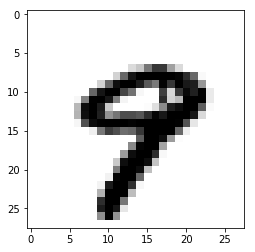

In [25]:
digit = test_images[9]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [26]:
test_labels[9]

9

In [27]:
prediction = model.predict(test_images_prepared[9:10], batch_size=784)
print(prediction)

[[1.8128697e-16 1.0802822e-16 9.0798148e-13 2.9923171e-08 1.1416229e-06
  1.2128995e-12 8.5668821e-18 4.2655185e-05 5.0633489e-08 9.9995613e-01]]


The highest likelihood is above 0.999 for number 9